## Procesamiento de Imágenes - Diplodatos 2022

Trabajo Práctico

In [1]:
integrantes = ["David Baulina"]
print(*integrantes, sep="\n")


David Baulina


Importar las librerías necesarias

In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Abrir imágenes de demo incluídas en la biblioteca. Para evitar cargar desde disco, pueden utilizar estas imágenes para resolver el TP. Si utilizan otras adjuntarlas en la entrega para reproducibilidad.

Imageio: 'coffee.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/coffee.png (441 kB)
Downloading: 8192/451102 bytes (1.8%)451102/451102 bytes (100.0%)
  Done
File saved as /root/.imageio/images/coffee.png.


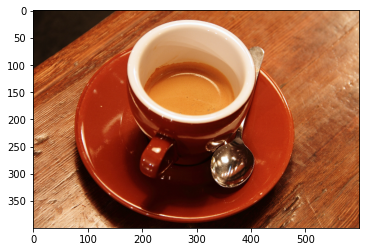

In [3]:
img_1 = imageio.imread('imageio:coffee.png')
plt.imshow(img_1)

# Ejercicio 1.1
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen.
Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).
Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

In [4]:
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

In [5]:
M = np.array([[0.299,      0.587,        0.114],
  [0.59590059, -0.27455667, -0.32134392],
  [0.21153661, -0.52273617, 0.31119955]])

[57.159      74.86187175 19.77059033]


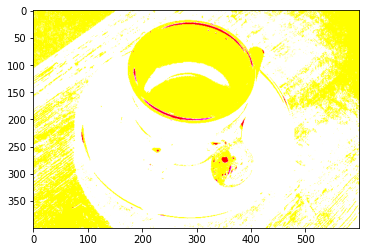

In [6]:
img_YIQ = apply_matrix(img_1, M)

print(img_YIQ[300,150])

plt.imshow(img_YIQ)

In [7]:
M = np.array([[0.3,      0.,        0.],
  [0., 3, 0.],
  [0., 0., 3]])

[57.159      74.86187175 19.77059033]
[ 17.1477     224.58561525  59.31177099]


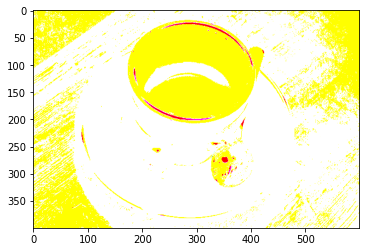

In [8]:
img_YIQ2=apply_matrix(img_YIQ, M)
plt.imshow(img_YIQ2)
print(img_YIQ[300,150])
print(img_YIQ2[300,150])

In [9]:
def YIQ2RGB(img):
    h,w,c = img.shape
    img_array = np.zeros ((h, w, 3), dtype = float) 
    Y = img[:,:,0]
    I = img[:,:,1]
    Q = img[:,:,2]

    img_array[:,:,0] = (1 * Y) + (0.95598634 * I) + (0.6208248 * Q)
    img_array[:,:,1] = (1 * Y) + (-0.27201283 * I) + (-0.64720424 * Q)
    img_array[:,:,2] = (1 * Y) + (-1.10674021 * I) + (1.70423049 * Q)

    return img_array

[ 268.6706987   -82.32929845 -130.32930245]


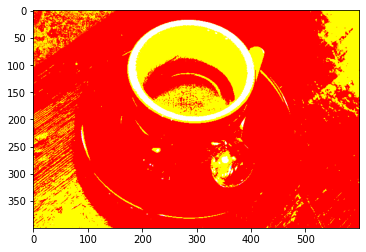

In [10]:
img_RGB2 = YIQ2RGB(img_YIQ2)

print(img_RGB2[300,150])

plt.imshow(img_RGB2)

# Ejercicio 1.2
Desarrollar un aplicativo o notebook que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos.
Los controles para elegir los filtros los organizan como les resulte más cómodo.

In [30]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def apply_matrix(img, M):
  return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

convert_to_YIQ_matrix = np.array([[0.299,      0.587,        0.114],
  [0.59590059, -0.27455667, -0.32134392],
  [0.21153661, -0.52273617, 0.31119955]])

def computar_v(img_rgb):
  r = img_rgb[:,:,0]
  g = img_rgb[:,:,1]
  b = img_rgb[:,:,2]

  v = np.maximum( r, np.maximum(g, b))
  return v

def histograma(v):
  plt.hist( np.sqrt(np.sqrt(v)).flatten())

def rgb_to_yiq(img):
  return apply_matrix(img, convert_to_YIQ_matrix)

def yiq_to_rgb(img):
  return apply_matrix(img, np.linalg.inv(convert_to_YIQ_matrix))

def filtro_lineal_a_trozos(x,y,img):

  img_YIQ = rgb_to_yiq(img)

  f = np.interp(img_YIQ[:,:,0], x, y, left = None, right = None, period = None)

  img_yiq3 = np.zeros(img.shape)
  img_yiq3[:,:,0] = img[:,:,0] * f
  img_yiq3[:,:,1] = img_YIQ[:,:,1]
  img_yiq3[:,:,2] = img_YIQ[:,:,2]

  img_tramos = yiq_to_rgb(img_yiq3)

  return img_tramos

def filtro_cuadrado(img):

  img_YIQ = rgb_to_yiq(img)

  img_yiq3 = np.zeros(img.shape)
  img_yiq3[:,:,0] = np.square(img[:,:,0])
  img_yiq3[:,:,1] = img_YIQ[:,:,1]
  img_yiq3[:,:,2] = img_YIQ[:,:,2]

  img_cuadrados = yiq_to_rgb(img_yiq3)

  return img_cuadrados

def filtro_raiz_cuadrada(img):

  img_YIQ = rgb_to_yiq(img)

  img_yiq3 = np.zeros(img.shape)
  img_yiq3[:,:,0] = np.sqrt(img[:,:,0])
  img_yiq3[:,:,1] = img_YIQ[:,:,1]
  img_yiq3[:,:,2] = img_YIQ[:,:,2]

  img_raiz_cuadrada = yiq_to_rgb(img_yiq3)

  return img_raiz_cuadrada



**Imagen sin filtros con su histograma**

In [32]:
img_rgb = imageio.imread("imageio:astronaut.png") / 255

img_YIQ = rgb_to_yiq(img_rgb)

v = computar_v(img_rgb)

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb, 'gray', vmin=0, vmax=1)
histograma(v)

**Filtro lineal a trozos**

In [33]:
#@markdown ### Elegir valores para X:
x1 = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}
x2= 0.2 #@param {type:"slider", min:0, max:1, step:0.1}


#@markdown ### Elegir valores para Y:
y1 = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}
y2= 0.5 #@param {type:"slider", min:0, max:1, step:0.1}


x = np.array([0, x1,  x2,  1])
y = np.array([0, y1, y2, 1])

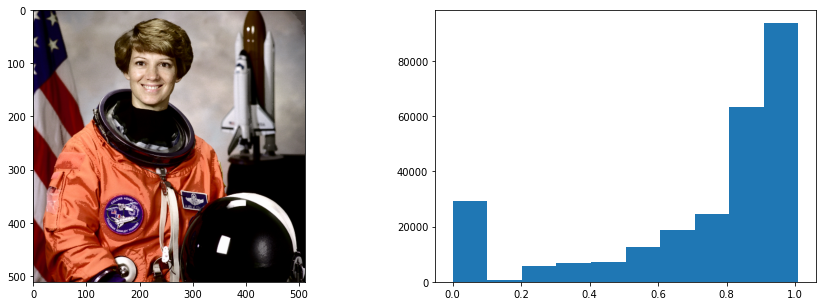

In [35]:
img_rgb2 = filtro_lineal_a_trozos(x, y, img_rgb)
v_tramos = computar_v(img_rgb2)

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb2, vmin=0, vmax=1)
histograma(v_tramos)

**Filtro cuadrado**

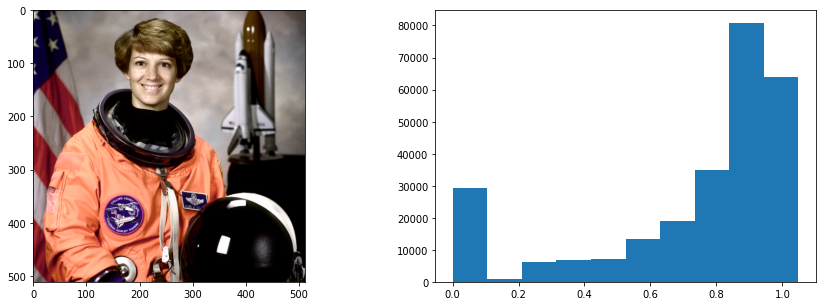

In [36]:
img_4_rgb = filtro_cuadrado(img_rgb)
v_cuadrado = computar_v(img_4_rgb)

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_4_rgb, vmin=0, vmax=1)
histograma(v_cuadrado)

**Filtro Raiz Cuadrada**

In [37]:
img_5_rgb = filtro_raiz_cuadrada(img_rgb)
v_raiz_cuadrada = computar_v(img_5_rgb)

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_5_rgb, vmin=0, vmax=1)
histograma(v_raiz_cuadrada)

# Ejercicio 2.1
Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:
1. Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.
2. Detectores de bordes: Laplaciano v4, Sobel 4 orientaciones.
3. Pasabanda.

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no ma- temáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original.

In [47]:
def convolucion(im, k):
  o = np.zeros(im.shape)
  filas = o.shape[0]
  cols = o.shape[1]

  for i in range(1, filas-1):
    for j in range(1, cols-1):
      total  =  im[i-1, j-1] * k[0, 0]
      total  += im[i-1, j]   * k[0, 1]
      total  += im[i-1, j+1] * k[0, 2]

      total  += im[i, j-1] * k[1, 0]
      total  += im[i, j]   * k[1, 1]
      total  += im[i, j+1] * k[1, 2]

      total  += im[i+1, j-1] * k[2, 0]
      total  += im[i+1, j]   * k[2, 1]
      total  += im[i+1, j+1] * k[2, 2]

      o[i,j] = total

  return o

float64


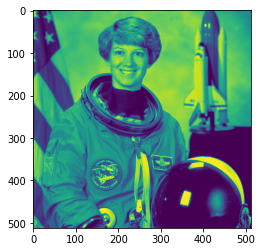

In [38]:
img_gris = rgb_to_yiq(img_rgb)
img_gris = img_gris[:,:,0]
print(img_gris.dtype)

plt.imshow(img_gris)

In [39]:
from scipy.signal import convolve2d
from scipy.stats import norm
kernel = np.zeros((3,3))

In [40]:
img_filt = convolve2d(img_gris, kernel, 'same')

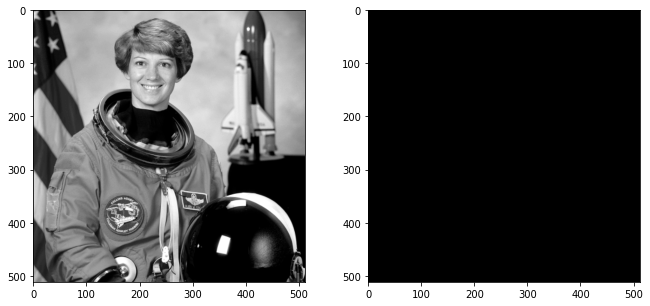

In [41]:
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt, 'gray')
plt.show()

**Filtro Plano**

In [42]:
def plano(N,kernel):
    kernel = np.zeros((N,N))
    kernel[:,:] = 1
    kernel /= kernel.sum()
    return(kernel)

In [55]:
#@markdown ### Elegir tamaño de matriz:
N_matriz = 51 #@param {type:"slider", min:0, max:100, step:1}

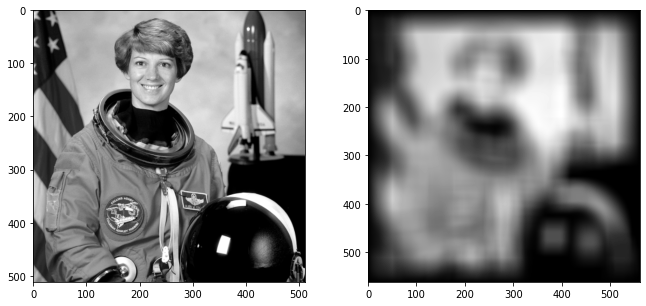

In [56]:
filtro_plano = plano(N_matriz,kernel)
img_filt = convolve2d(img_gris, filtro_plano)

fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt, 'gray')
plt.show()

**Bartlett 3x3**

In [90]:
def bartlett(N_corrimiento):
    corrimiento = np.zeros((3,3))
    corrimiento[:,:] = N_corrimiento
    print(corrimiento)
    kernel = np.outer(np.bartlett(3),np.bartlett(3)) + N_corrimiento
    kernel /= kernel.sum()
    print(kernel)
    return kernel

In [93]:
#@markdown ### Elegir cantidad entre 0 y 1:
N_corrimiento= .2 #@param {type:"number"}

[[0.2 0.2 0.2]
 [0.2 0.2 0.2]
 [0.2 0.2 0.2]]
[[0.07142857 0.07142857 0.07142857]
 [0.07142857 0.42857143 0.07142857]
 [0.07142857 0.07142857 0.07142857]]


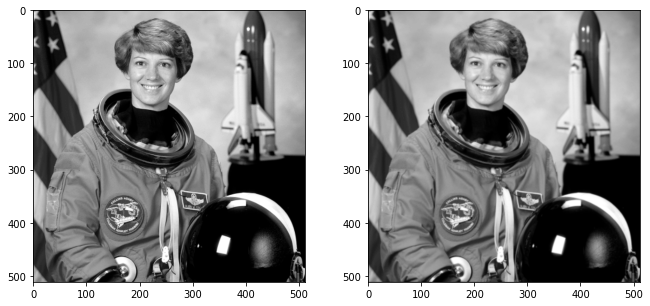

In [94]:
kernel_bartlett = bartlett(N_corrimiento)
img_filt2 = convolve2d(img_gris, kernel_bartlett, 'same')
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt2, 'gray')
plt.show()

**Gaussiano 5x5**

In [96]:
def gaussiano(N, sigma):
        kernel_gauss = norm.pdf(np.arange(N), (N-1)/2, sigma)
        kernel_gauss = np.outer(kernel_gauss, kernel_gauss)
        kernel_gauss = kernel_gauss/np.sum(kernel_gauss)
        
        return kernel_gauss

In [101]:
#@markdown ### Elegir desviacion standard:
sigma= 2 #@param {type:"number"}

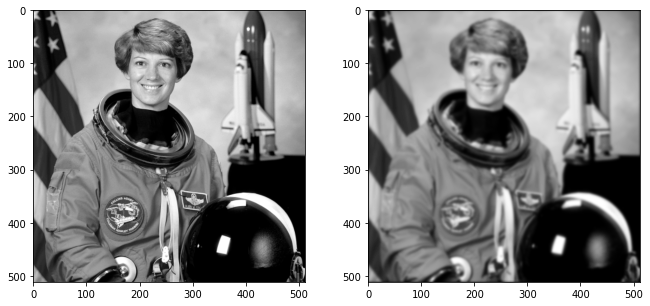

In [104]:
kernel_gauss = gaussiano(25, sigma)
img_filt3 = convolve2d(img_gris, kernel_gauss, 'same')
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt3, 'gray')
plt.show()

**Laplaciano**

In [105]:
kernel_laplaciano_4 = np.array([[0, -1, 0],
                                [-1, 4, -1],
                                [0, -1, 0]])

img_filt4 = convolve2d(img_gris, kernel_laplaciano_4, 'same')

In [106]:
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt4, 'gray')
plt.show()

**sobel 3x3**

In [107]:
# vertical
kernel_Gx = np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]])


# horizontal
kernel_Gy = np.array([[1, 2, 1],
                      [0, 0, 0],
                      [-1, -2, -1]])

kernel_Gxx = np.array([[1, 0, -1],
                      [2, 0, -2],
                      [1, 0, -1]])

kernel_Gyy = np.array([[-1, -2, -1],
                      [0, 0, 0],
                      [1, 2, 1]])


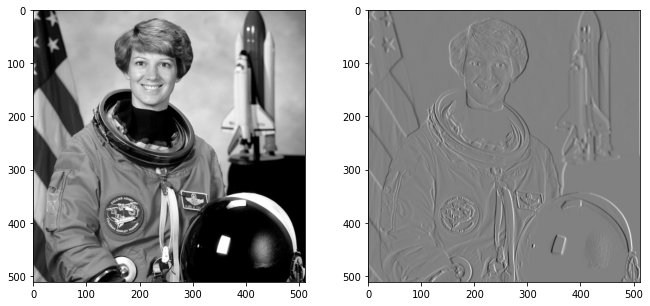

In [109]:

img_filt5 = convolve2d(img_gris, kernel_Gx, 'same')
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt5, 'gray')
plt.show()

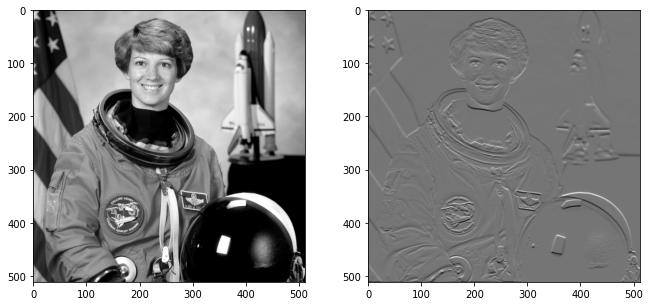

In [110]:
img_filt6 = convolve2d(img_gris, kernel_Gy, 'same')
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt6, 'gray')
plt.show()

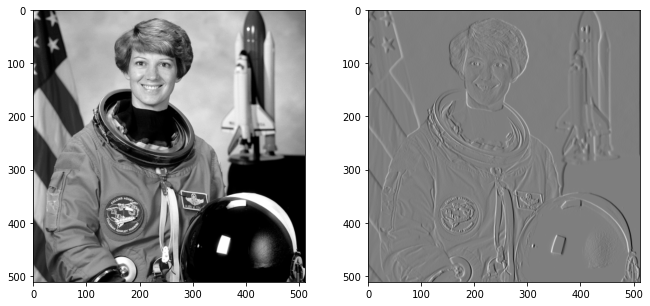

In [111]:
img_filt7 = convolve2d(img_gris, kernel_Gxx, 'same')
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt7, 'gray')
plt.show()

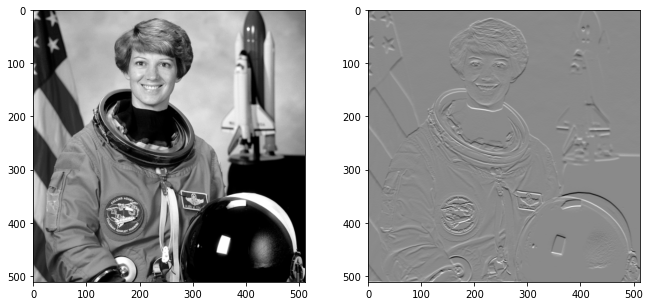

In [112]:
img_filt8 = convolve2d(img_gris, kernel_Gyy, 'same')
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt8, 'gray')
plt.show()

**Filtro pasabanda - Diferencia de gaussianas**

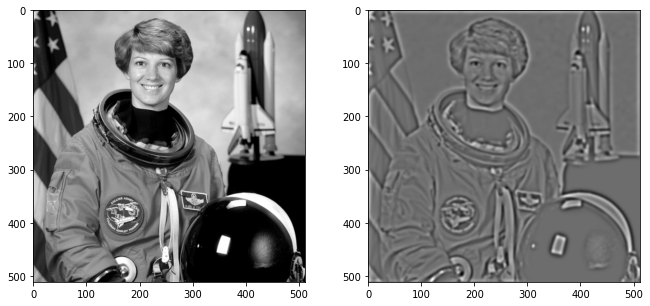

In [114]:
kernel_diff_gauss = gaussiano(25,2)- gaussiano(25, 4)
img_filt9 = convolve2d(img_gris, kernel_diff_gauss, 'same')
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt9, 'gray')
plt.show()

#Ejercicio 2.2
Desarrollar un aplicativo o notebook que implemente los conceptos de morfología en niveles de gris aquí descriptos, con un elemento estructurante 3x3. El mismo incluirá las siguientes funciones:
- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (máximo)
- Apertura, cierre, borde morfológico
- Mediana
- Top-hat
Incluir la capacidad de copiar la componente de la imagen procesada en la componente original, para poder aplicar dos o más filtrados en secuencia.

In [115]:
def circle_SE(radius):
    kernel = np.zeros((2*radius+1, 2*radius+1))
    y, x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    kernel[mask] = 1
    se_circle = kernel > 0
    return se_circle

In [116]:
se_circle = circle_SE(1)

In [132]:
def _morph_op(img, se, fcn):
    se_flip = np.flip(se, axis=[0,1])
    rk, ck = se_flip.shape
    img_pad = np.pad(img, ((rk//2, rk//2), (ck//2, ck//2)), 'edge')
    salida = np.zeros(img.shape)
    for r,c in np.ndindex(img.shape):
        salida[r,c] = fcn(img_pad[r:r+rk,c:c+ck][se_flip])
    return salida

**Erosion**

In [122]:
def erosion(img, se):
  return _morph_op(img, se, np.min)

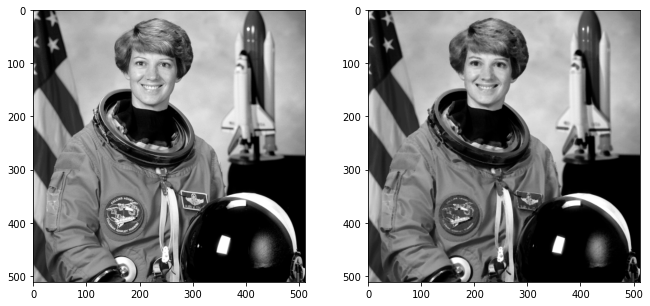

In [123]:
img_filt10 = erosion(img_gris, se_circle)
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt10, 'gray')
plt.show()

**Dilatación**

In [124]:
def dilatacion(img, se):
  return _morph_op(img, se, np.max)

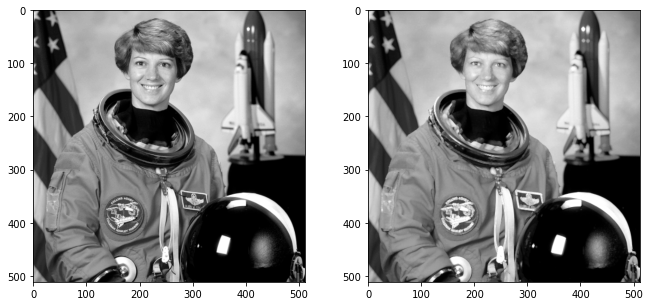

In [125]:
img_filt11 = dilatacion(img_gris, se_circle)
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt11, 'gray')
plt.show()

**Mediana**

In [126]:
def mediana(img, se):
  return _morph_op(img, se, np.median)

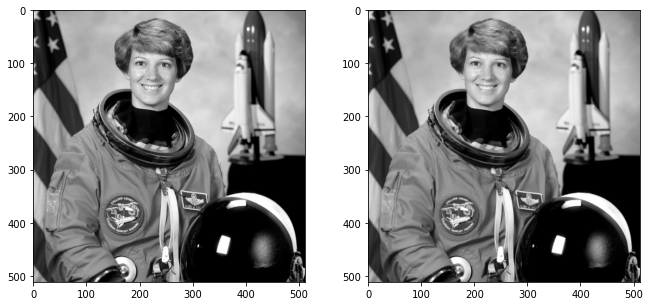

In [127]:
img_filt12 = mediana(img_gris, se_circle)
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt12, 'gray')
plt.show()

**Apertura**

In [128]:
def apertura(img, se):
    imagen_apertura = dilatacion(erosion(img, se), se)
    return imagen_apertura

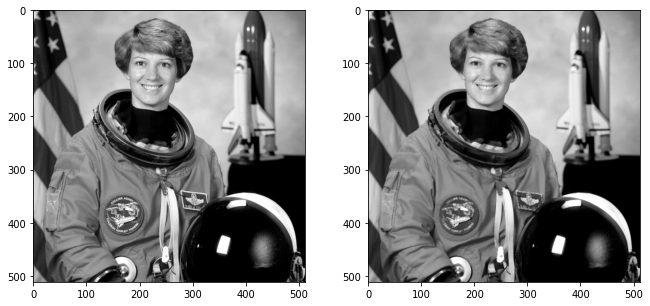

In [129]:
img_filt13 = apertura(img_gris, se_circle)
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt13, 'gray')
plt.show()

**Cierre**

In [130]:
def cierre(img, se):
    imagen_cierre = erosion(dilatacion(img, se), se)
    return imagen_cierre

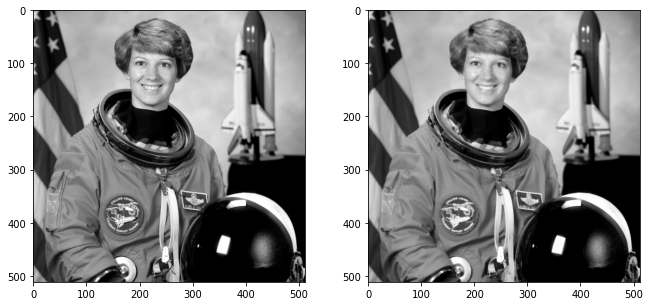

In [131]:
img_filt14 = cierre(img_gris, se_circle)
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt14, 'gray')
plt.show()

**Top Hat**

In [133]:
def top_hat(img, se):
    top_hat = img - apertura(img, se)
    return top_hat

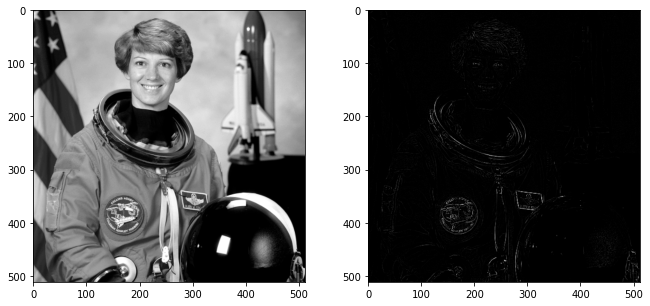

In [134]:
img_filt15 = top_hat(img_gris, se_circle)
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt15, 'gray')
plt.show()

Bucle

In [139]:
img_filt17 = top_hat(img_gris, se_circle)

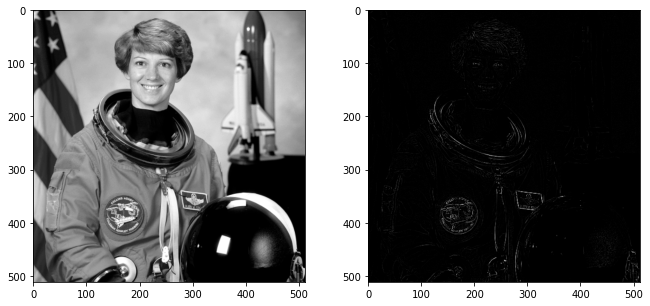

In [144]:
img_filt17 = top_hat(img_filt17, se_circle)
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt17, 'gray')
plt.show()

**Borde Morfologico**

In [135]:
def borde_morfologico(img, se):
    img_borde_morfologico = cierre(apertura(img, se), se)
    return img_borde_morfologico

In [136]:
img_filt16 = borde_morfologico(img_gris, se_circle)
fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.imshow(img_gris, 'gray')
ax2 = fig.add_subplot(132)
ax2.imshow(img_filt16, 'gray')
plt.show()

# Ejercicios Optativos. Ver presentación para más detalle
Recordá que hay ejercicios opcionales especificados en la presentación correspondiente al trabajo práctico.